# 타이타닉 생존자 예측

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Null data 전처리

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Sex, Cabin, Embarked 값 분포 확인

In [9]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
B73              1
C111             1
C46              1
A36              1
D49              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


## 성별, 객실 등급, 나이에 따른 생존율

In [15]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

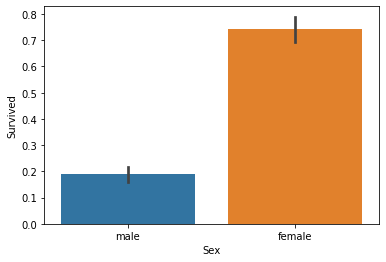

In [14]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

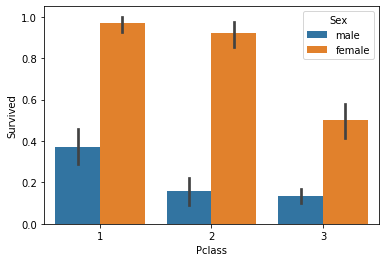

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

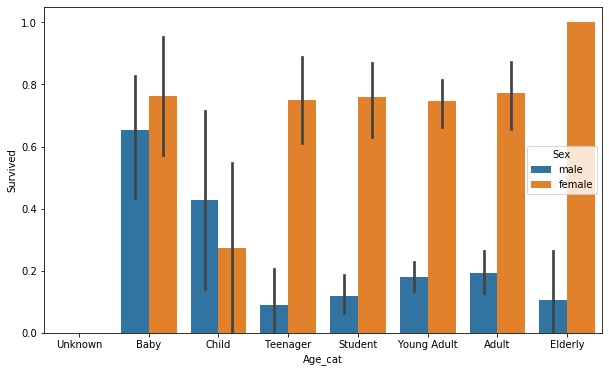

In [20]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

## Labeling, 문자형 카테고리 features => 숫자형 카테고리 features(0, 1)

In [21]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## Function Implementation

In [25]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # PassengerId, Name, Ticket 은 생존율에 영향이 없을 것이라 판단
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_feautres(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_feautres(X_titanic_df)

## 성능 평가

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

- train-test-split_model

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2)

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Score of DecisionTreeClassifier: ', accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Score of RandomForestClassifier: ', accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Score of LogistiicRegression: ', accuracy_score(y_test, lr_pred))

Score of DecisionTreeClassifier:  0.776536312849162
Score of RandomForestClassifier:  0.8547486033519553
Score of LogistiicRegression:  0.8491620111731844


- cross-validation_model

In [58]:
# KFold 모델 사용
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        
    print(np.mean(scores))

print('Score of DecisionTreeClassifier: ', end='')
exec_kfold(dt_clf, folds=5)
print('Score of RandomForestClassifier: ', end='')
exec_kfold(rf_clf, folds=5)
print('Score of LogisticRegression: ', end='')
exec_kfold(lr_clf, folds=5)


Score of DecisionTreeClassifier: 0.7856757265708366
Score of RandomForestClassifier: 0.8070177641077146
Score of LogisticRegression: 0.7901198920343984


In [61]:
# cross-val-score 모델 사용
from sklearn.model_selection import cross_val_score

classifiers = [dt_clf, rf_clf, lr_clf]
scores = []

for clf in classifiers:
    scores.append(cross_val_score(clf, X_titanic_df, y_titanic_df, cv=5))

print('Score of DecisionTreeClassifier: ', np.mean(scores[0]))
print('Score of RandomForestClassifier: ', np.mean(scores[1]))
print('Score of LogisticRegression: ', np.mean(scores[2]))

Score of DecisionTreeClassifier:  0.7935889129214371
Score of RandomForestClassifier:  0.8058794157147331
Score of LogisticRegression:  0.7879080937673661


- grid-search-cv_model(DecisonTreeClassifier만 사용)

In [67]:
# 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('Score of DecisionTreeClassifier: ', accuracy)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7921348314606742
Score of DecisionTreeClassifier:  0.8435754189944135
